# 8 Puzzle Problem Using DFS

## Logic

We can perform a depth-first search on state space (Set of all configurations of a given problem i.e. all states that can be reached from the initial state) tree.

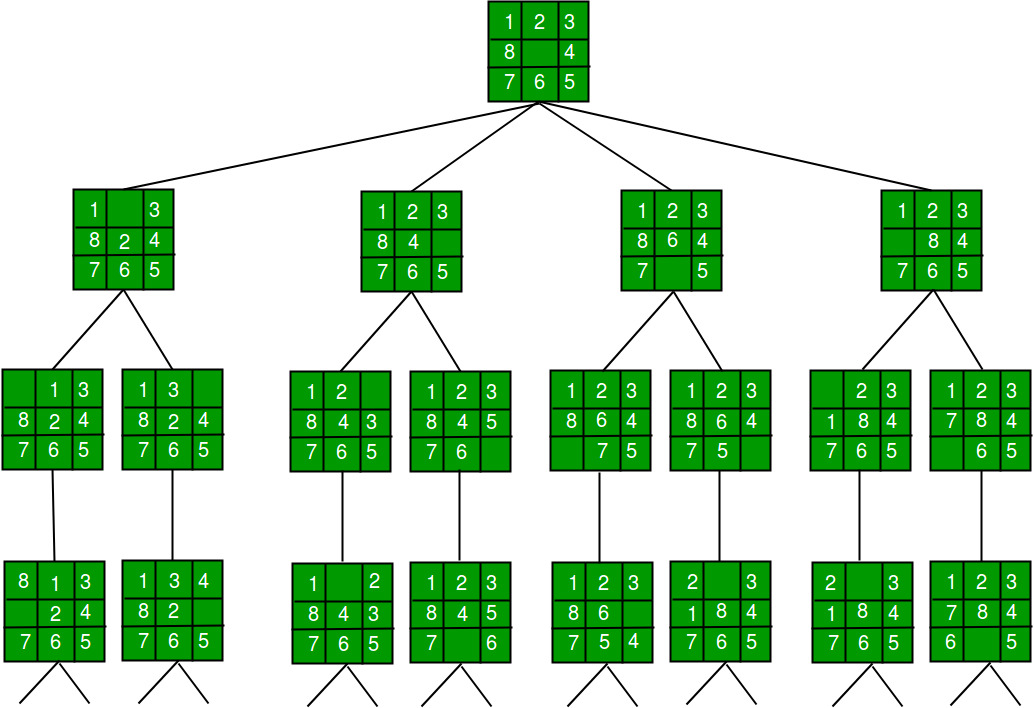

In this solution, successive moves can take us away from the goal rather than bringing closer. The search of state space tree follows the leftmost path from the root regardless of the initial state. An answer node may never be found in this approach.

## Code

In [1]:
def dfs(src,target,limit,visited_states):
    if src == target:
        return True
    if limit <= 0:
        return False
    visited_states.append(src)
    moves = possible_moves(src,visited_states)   
    for move in moves:
        if dfs(move, target, limit-1, visited_states):
            return True
    return False



In [2]:
def possible_moves(state,visited_states): 
    b = state.index(-1)  
    d = []
    if b not in [0,1,2]: 
        d += 'u'
    if b not in [6,7,8]:
        d += 'd'
    if b not in [2,5,8]: 
        d += 'r'
    if b not in [0,3,6]: 
        d += 'l'
    pos_moves = []
    for move in d:
        pos_moves.append(gen(state,move,b))
    return [move for move in pos_moves if move not in visited_states]

In [3]:
def gen(state, move, blank): 
    temp = state.copy()                              
    if move == 'u':
        temp[blank-3], temp[blank] = temp[blank], temp[blank-3]
    if move == 'd':
        temp[blank+3], temp[blank] = temp[blank], temp[blank+3]
    if move == 'r':
        temp[blank+1], temp[blank] = temp[blank], temp[blank+1]
    if move == 'l':
        temp[blank-1], temp[blank] = temp[blank], temp[blank-1]
    return temp



In [4]:
def iddfs(src,target,depth):
    for i in range(depth):
        visited_states = []
        if dfs(src,target,i+1,visited_states):
            return True
    return False

In [5]:
# Test 1
src = [3,5,2,8,7,6,4,1,-1]
target = [-1,3,7,8,1,5,4,6,2]

depth = 1
iddfs(src, target, depth)

False

In [6]:
# Test 2
src = [1,2,3,-1,4,5,6,7,8] 
target=[1,2,3,6,4,5,-1,7,8]

depth = 1
iddfs(src, target, depth)

True